In [1]:
from sqlalchemy import create_engine
import pandas as pd
from datetime import datetime
import pickle
def read_database(db):
    connect_string = 'mysql+pymysql://{}:{}@{}:{}/{}?charset=utf8mb4'.format("admin", "SoftwarePass!", 'database-1.chkvd5qjrkby.us-east-1.rds.amazonaws.com', 3306, "dublinbikes")
    engine = create_engine(connect_string, echo=False)
    df = pd.read_sql(db, engine)
    return df

Bikes = read_database("Bikes")#or "Weather", "Bikes"

In [2]:
Weather = read_database("Weather")#or "Weather", "Bikes"
print(Weather)

      current_weather  detailed_weather  temperature           last_update
0              Clouds     broken clouds            3  25 Feb 2020 09:43:00
1              Clouds  scattered clouds            3  25 Feb 2020 09:50:02
2              Clouds  scattered clouds            4  25 Feb 2020 10:00:02
3              Clouds  scattered clouds            4  25 Feb 2020 10:05:03
4              Clouds  scattered clouds            4  25 Feb 2020 10:05:03
...               ...               ...          ...                   ...
14174          Clouds     broken clouds           12  14 Apr 2020 17:05:13
14175          Clouds     broken clouds           12  14 Apr 2020 17:13:10
14176          Clouds     broken clouds           12  14 Apr 2020 17:19:42
14177          Clouds     broken clouds           12  14 Apr 2020 17:19:42
14178          Clouds     broken clouds           12  14 Apr 2020 17:27:08

[14179 rows x 4 columns]


In [3]:
print(Weather.nunique())

current_weather        6
detailed_weather      17
temperature           22
last_update         9002
dtype: int64


In [4]:
Weather['current_weather'].value_counts()

Clouds     11752
Rain        1862
Drizzle      294
Mist         112
Clear         88
Fog           71
Name: current_weather, dtype: int64

In [5]:
Weather = Weather[['current_weather', 'temperature', 'last_update']]
Weather

,current_weather,temperature,last_update
0,Clouds,3,25 Feb 2020 09:43:00
1,Clouds,3,25 Feb 2020 09:50:02
2,Clouds,4,25 Feb 2020 10:00:02
3,Clouds,4,25 Feb 2020 10:05:03
4,Clouds,4,25 Feb 2020 10:05:03
...,...,...,...
14174,Clouds,12,14 Apr 2020 17:05:13
14175,Clouds,12,14 Apr 2020 17:13:10
14176,Clouds,12,14 Apr 2020 17:19:42
14177,Clouds,12,14 Apr 2020 17:19:42


In [6]:
Weather['last_update'] = pd.to_datetime(Weather['last_update'])
Weather

,current_weather,temperature,last_update
0,Clouds,3,2020-02-25 09:43:00
1,Clouds,3,2020-02-25 09:50:02
2,Clouds,4,2020-02-25 10:00:02
3,Clouds,4,2020-02-25 10:05:03
4,Clouds,4,2020-02-25 10:05:03
...,...,...,...
14174,Clouds,12,2020-04-14 17:05:13
14175,Clouds,12,2020-04-14 17:13:10
14176,Clouds,12,2020-04-14 17:19:42
14177,Clouds,12,2020-04-14 17:19:42


In [7]:
Weather2 = pd.get_dummies(Weather['current_weather'])

In [8]:
Weather3 = pd.concat([Weather, Weather2], axis=1)
Weather3

,current_weather,temperature,last_update,Clear,Clouds,Drizzle,Fog,Mist,Rain
0,Clouds,3,2020-02-25 09:43:00,0,1,0,0,0,0
1,Clouds,3,2020-02-25 09:50:02,0,1,0,0,0,0
2,Clouds,4,2020-02-25 10:00:02,0,1,0,0,0,0
3,Clouds,4,2020-02-25 10:05:03,0,1,0,0,0,0
4,Clouds,4,2020-02-25 10:05:03,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14174,Clouds,12,2020-04-14 17:05:13,0,1,0,0,0,0
14175,Clouds,12,2020-04-14 17:13:10,0,1,0,0,0,0
14176,Clouds,12,2020-04-14 17:19:42,0,1,0,0,0,0
14177,Clouds,12,2020-04-14 17:19:42,0,1,0,0,0,0


In [9]:
Weather3 = Weather3.set_index('last_update')

In [10]:
# Weather = Weather.groupby('last_update')['current_weather', 'temperature'].mean().reset_index()

# Weather = Weather.resample('H').mean()
Weather3 = Weather3.resample('15min').mean()
Weather3

,temperature,Clear,Clouds,Drizzle,Fog,Mist,Rain
last_update,,,,,,,
2020-02-25 09:30:00,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-25 09:45:00,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-25 10:00:00,4.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-25 10:15:00,4.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-25 10:30:00,4.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-04-14 16:15:00,12.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-04-14 16:30:00,12.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-04-14 16:45:00,13.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
for data in ['Clear', 'Clouds', 'Drizzle', 'Fog', 'Mist', 'Rain']:
    Weather3[data] = Weather3[data].apply(lambda x: 0 if x < 0.5 else 1)

In [12]:
Weather3

,temperature,Clear,Clouds,Drizzle,Fog,Mist,Rain
last_update,,,,,,,
2020-02-25 09:30:00,3.0,0,1,0,0,0,0
2020-02-25 09:45:00,3.0,0,1,0,0,0,0
2020-02-25 10:00:00,4.0,0,1,0,0,0,0
2020-02-25 10:15:00,4.0,0,1,0,0,0,0
2020-02-25 10:30:00,4.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2020-04-14 16:15:00,12.0,0,1,0,0,0,0
2020-04-14 16:30:00,12.0,0,1,0,0,0,0
2020-04-14 16:45:00,13.0,0,1,0,0,0,0


In [13]:
names = Bikes.name.unique()

In [14]:
Bikes = Bikes.loc[Bikes['name'] == 'SMITHFIELD NORTH']#isolate one station

Bikes['last_update'] = pd.to_datetime(Bikes['last_update'])
Bikes = Bikes.set_index('last_update')
# Bikes = Bikes.groupby('Station').resample('30min').mean().reset_index('Station')
Bikes = Bikes.resample('15min').mean()
Bikes = Bikes.round()
Bikes

,available_bike_stands,available_bikes
last_update,,
2020-02-25 09:45:00,24.0,6.0
2020-02-25 10:00:00,28.0,2.0
2020-02-25 10:15:00,29.0,1.0
2020-02-25 10:30:00,30.0,0.0
2020-02-25 10:45:00,29.0,1.0
...,...,...
2020-04-14 16:00:00,5.0,25.0
2020-04-14 16:15:00,10.0,20.0
2020-04-14 16:30:00,9.0,21.0


In [15]:
df = pd.concat([Bikes, Weather3], axis=1)
df['last_update'] = df.index

In [16]:
df = df.reset_index(drop=True)
df

,available_bike_stands,available_bikes,temperature,Clear,Clouds,Drizzle,Fog,Mist,Rain,last_update
0,NaN,NaN,3.0,0,1,0,0,0,0,2020-02-25 09:30:00
1,24.0,6.0,3.0,0,1,0,0,0,0,2020-02-25 09:45:00
2,28.0,2.0,4.0,0,1,0,0,0,0,2020-02-25 10:00:00
3,29.0,1.0,4.0,0,1,0,0,0,0,2020-02-25 10:15:00
4,30.0,0.0,4.0,0,1,0,0,0,0,2020-02-25 10:30:00
...,...,...,...,...,...,...,...,...,...,...
4731,10.0,20.0,12.0,0,1,0,0,0,0,2020-04-14 16:15:00
4732,9.0,21.0,12.0,0,1,0,0,0,0,2020-04-14 16:30:00
4733,9.0,21.0,13.0,0,1,0,0,0,0,2020-04-14 16:45:00
4734,9.0,21.0,12.0,0,1,0,0,0,0,2020-04-14 17:00:00


In [17]:
df.dropna(subset = ["available_bike_stands"], inplace=True)
df

,available_bike_stands,available_bikes,temperature,Clear,Clouds,Drizzle,Fog,Mist,Rain,last_update
1,24.0,6.0,3.0,0,1,0,0,0,0,2020-02-25 09:45:00
2,28.0,2.0,4.0,0,1,0,0,0,0,2020-02-25 10:00:00
3,29.0,1.0,4.0,0,1,0,0,0,0,2020-02-25 10:15:00
4,30.0,0.0,4.0,0,1,0,0,0,0,2020-02-25 10:30:00
5,29.0,1.0,4.0,0,1,0,0,0,0,2020-02-25 10:45:00
...,...,...,...,...,...,...,...,...,...,...
4730,5.0,25.0,12.6,0,1,0,0,0,0,2020-04-14 16:00:00
4731,10.0,20.0,12.0,0,1,0,0,0,0,2020-04-14 16:15:00
4732,9.0,21.0,12.0,0,1,0,0,0,0,2020-04-14 16:30:00
4733,9.0,21.0,13.0,0,1,0,0,0,0,2020-04-14 16:45:00


In [18]:
df['Last_updated_day'] = df['last_update'].dt.day
df['Last_updated_hour'] = df['last_update'].dt.hour
df['Last_updated_minute'] = df['last_update'].dt.minute
df['Last_updated_dayofweek'] = df['last_update'].dt.dayofweek
df

,available_bike_stands,available_bikes,temperature,Clear,Clouds,Drizzle,Fog,Mist,Rain,last_update,Last_updated_day,Last_updated_hour,Last_updated_minute,Last_updated_dayofweek
1,24.0,6.0,3.0,0,1,0,0,0,0,2020-02-25 09:45:00,25,9,45,1
2,28.0,2.0,4.0,0,1,0,0,0,0,2020-02-25 10:00:00,25,10,0,1
3,29.0,1.0,4.0,0,1,0,0,0,0,2020-02-25 10:15:00,25,10,15,1
4,30.0,0.0,4.0,0,1,0,0,0,0,2020-02-25 10:30:00,25,10,30,1
5,29.0,1.0,4.0,0,1,0,0,0,0,2020-02-25 10:45:00,25,10,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,5.0,25.0,12.6,0,1,0,0,0,0,2020-04-14 16:00:00,14,16,0,1
4731,10.0,20.0,12.0,0,1,0,0,0,0,2020-04-14 16:15:00,14,16,15,1
4732,9.0,21.0,12.0,0,1,0,0,0,0,2020-04-14 16:30:00,14,16,30,1
4733,9.0,21.0,13.0,0,1,0,0,0,0,2020-04-14 16:45:00,14,16,45,1


In [19]:
df.dropna(subset = ["temperature"], inplace=True)

In [20]:
df

,available_bike_stands,available_bikes,temperature,Clear,Clouds,Drizzle,Fog,Mist,Rain,last_update,Last_updated_day,Last_updated_hour,Last_updated_minute,Last_updated_dayofweek
1,24.0,6.0,3.0,0,1,0,0,0,0,2020-02-25 09:45:00,25,9,45,1
2,28.0,2.0,4.0,0,1,0,0,0,0,2020-02-25 10:00:00,25,10,0,1
3,29.0,1.0,4.0,0,1,0,0,0,0,2020-02-25 10:15:00,25,10,15,1
4,30.0,0.0,4.0,0,1,0,0,0,0,2020-02-25 10:30:00,25,10,30,1
5,29.0,1.0,4.0,0,1,0,0,0,0,2020-02-25 10:45:00,25,10,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,5.0,25.0,12.6,0,1,0,0,0,0,2020-04-14 16:00:00,14,16,0,1
4731,10.0,20.0,12.0,0,1,0,0,0,0,2020-04-14 16:15:00,14,16,15,1
4732,9.0,21.0,12.0,0,1,0,0,0,0,2020-04-14 16:30:00,14,16,30,1
4733,9.0,21.0,13.0,0,1,0,0,0,0,2020-04-14 16:45:00,14,16,45,1


In [35]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import metrics

In [28]:
continuous_columns = df.select_dtypes(['int64', 'float64']).columns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text xticklabel objects>)

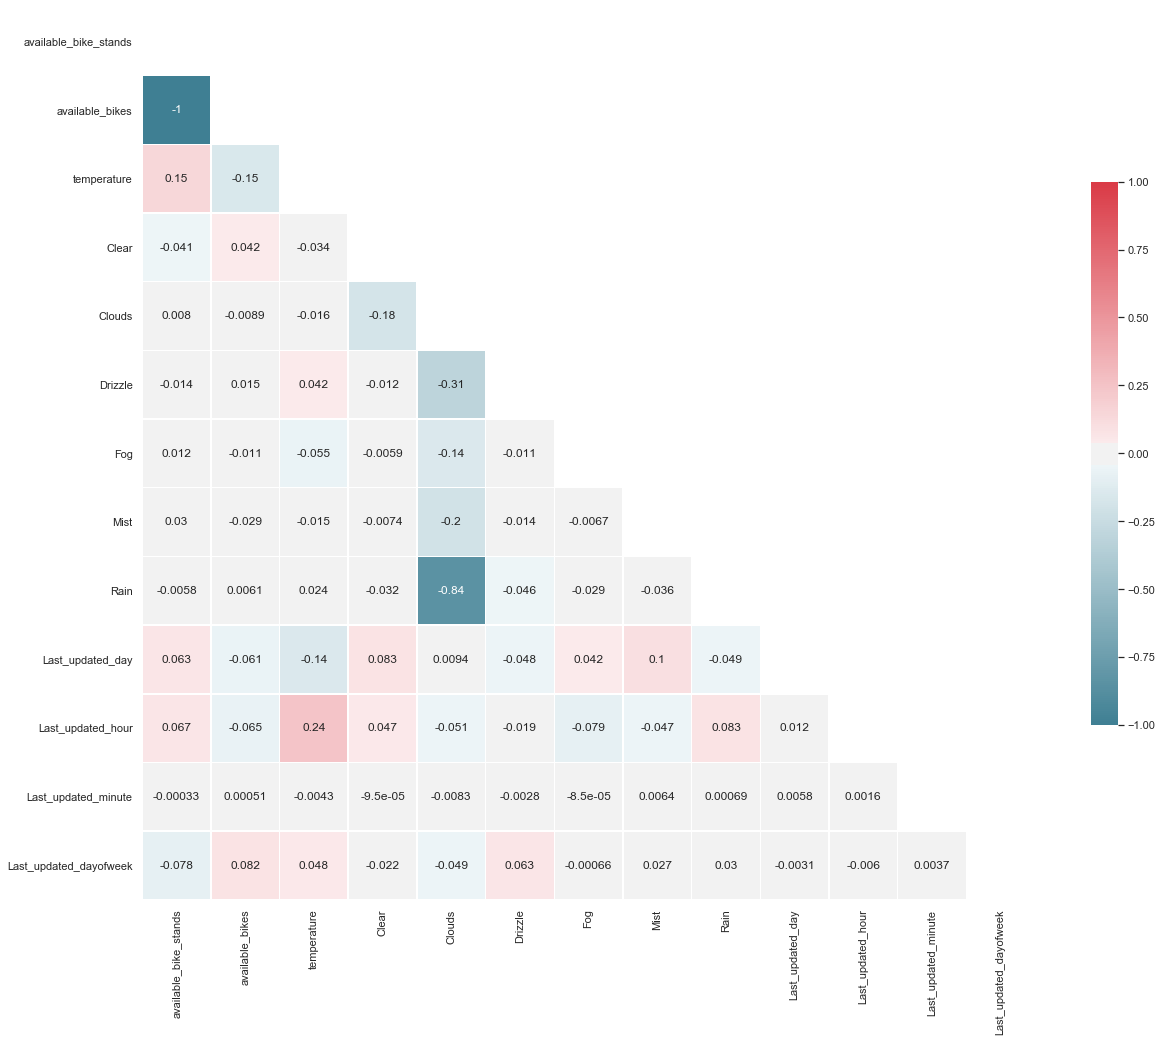

In [29]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [31]:
y = df.available_bikes
# Create X
features = ['temperature', 'Clear', 'Clouds', 'Drizzle', 'Fog', 'Mist', 'Rain', 'Last_updated_day', 'Last_updated_hour', 'Last_updated_minute','Last_updated_dayofweek']
X = df[features]


In [32]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [33]:
# Specify Model
rf_model = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
# Fit Model
rf_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [34]:
importance = pd.DataFrame({'feature': df[features].columns, 'importance':rf_model.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
8,Last_updated_hour,0.361568
7,Last_updated_day,0.288574
10,Last_updated_dayofweek,0.155305
0,temperature,0.154635
2,Clouds,0.013273
9,Last_updated_minute,0.012596
6,Rain,0.010724
3,Drizzle,0.001549
4,Fog,0.000915
5,Mist,0.000448


In [42]:
val_predictions = rf_model.predict(val_X)
df_true_vs_rfc_predicted = pd.DataFrame({'Actual': val_y, 'Predicted': val_predictions})
df_true_vs_rfc_predicted.head(10)

,Actual,Predicted
4315,16.0,15.61
2563,18.0,18.00
2952,21.0,21.00
3225,16.0,16.23
573,3.0,4.35
3205,14.0,14.20
3389,20.0,16.99
2012,22.0,21.54
1290,20.0,18.83
2821,15.0,15.03


In [47]:
print("==================== Train Data =======================")
print("r2 score: ", metrics.r2_score(val_y, val_predictions))
print("Mean Absolute Error: ", metrics.mean_absolute_error(val_y, val_predictions))
print("Root Mean Squared Error: ", metrics.mean_squared_error(val_y, val_predictions)**0.5)

==================== Train Data =======================
r2 score:  0.9539720034426733
Mean Absolute Error:  0.9897375328083989
Root Mean Squared Error:  1.6140694563660367


In [26]:
time = "2020-04-21 15:52:05"
time2 = datetime.strptime(time, '%Y-%m-%d  %H:%M:%S')
#['temperature', 'Clear', 'Clouds', 'Drizzle', 'Fog', 'Mist', 'Rain', 'Last_updated_day', 'Last_updated_hour', 'Last_updated_minute','Last_updated_dayofweek']
values = [8, 0, 1, 0, 0, 0, 0, time2.day, time2.hour, time2.minute, time2.weekday()]
print(f"Expected number of bikes at {time} is {rf_model.predict([values])[0]}")

Expected number of bikes at 2020-04-21 15:52:05 is 22.11
